In [1]:
import numpy as np

p = 8
a = p - 3.01
b = p + 7.01
h = 0.1


def F(x):
    return x ** 3 - p * x ** 2


x_vals = np.arange(a, b + h, h)
y_vals = [F(x) for x in x_vals]

with open("tab.txt", "w") as file:
    for x, y in zip(x_vals, y_vals):
        file.write(f"{x:.2f} {y:.8f}\n")


In [2]:
roots_intervals = []
for i in range(len(x_vals) - 1):
    if F(x_vals[i]) * F(x_vals[i + 1]) < 0:
        roots_intervals.append((x_vals[i], x_vals[i + 1]))

print("Інтервали з можливими коренями:")
for interval in roots_intervals:
    print(f"[{interval[0]:.2f}, {interval[1]:.2f}]")



Інтервали з можливими коренями:
[7.99, 8.09]


In [3]:
def F_prime(x):
    return 3 * x ** 2 - 2 * p * x


def F_double_prime(x):
    return 6 * x - 2 * p


eps = 1e-10




In [4]:
def simple_iteration(x0, tol=1e-10, max_iter=1000):
    tau = 0.1
    x = x0
    for k in range(max_iter):
        x_new = x - tau * F(x)
        if abs(x_new - x) < tol:
            return x_new, k + 1
        x = x_new
    return x, max_iter


x0, x1 = 7.99, 8.09
x_start = (x0 + x1) / 2

root, iters = simple_iteration(x_start)

print(f"\nКорінь на інтервалі [{x0:.6f}, {x1:.6f}]:")
print(f"Проста ітерація:       x ≈ {root:.10f}, ітерацій: {iters}")





Корінь на інтервалі [7.990000, 8.090000]:
Проста ітерація:       x ≈ -0.0012202068, ітерацій: 1000


In [5]:
def newton_method(x0, tol=eps, max_iter=1000):
    for i in range(max_iter):
        f, fp = F(x0), F_prime(x0)
        if fp == 0:
            break
        x1 = x0 - f / fp
        if abs(x1 - x0) < tol and abs(F(x1)) < tol:
            return x1, i + 1
        x0 = x1
    return x0, max_iter


root_newton, iters_newton = newton_method(x_start)
print(f"Метод Ньютона:         x ≈ {root_newton:.10f}, ітерацій: {iters_newton}")




Метод Ньютона:         x ≈ 8.0000000000, ітерацій: 4


In [6]:
def chebyshev_method(x0, tol=eps, max_iter=1000):
    for i in range(max_iter):
        f, fp, fpp = F(x0), F_prime(x0), F_double_prime(x0)
        if fp == 0:
            break
        dx = f / fp
        x1 = x0 - dx - (fpp / (2 * fp)) * dx ** 2
        if abs(x1 - x0) < tol and abs(F(x1)) < tol:
            return x1, i + 1
        x0 = x1
    return x0, max_iter


root_cheb, iters_cheb = chebyshev_method(x_start)
print(f"Метод Чебишева:        x ≈ {root_cheb:.10f}, ітерацій: {iters_cheb}")

Метод Чебишева:        x ≈ 8.0000000000, ітерацій: 3


In [7]:
def hord_method(x0, x1, tol=eps, max_iter=1000):
    for i in range(max_iter):
        f0, f1 = F(x0), F(x1)
        if f1 - f0 == 0:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol and abs(F(x2)) < tol:
            return x2, i + 1
        x0, x1 = x1, x2
    return x1, max_iter


root, iters = hord_method(x0, x1, tol=eps)
print(f"Метод хорд:            x ≈ {root:.10f}, ітерацій: {iters}")

Метод хорд:            x ≈ 8.0000000000, ітерацій: 5


In [8]:
def parabola_method(x0, x1, x2, tol=eps, max_iter=1000):
    for k in range(max_iter):
        f0, f1, f2 = F(x0), F(x1), F(x2)
        denom = (x0 - x1) * (x0 - x2) * (x1 - x2)
        if abs(denom) < 1e-12:
            return x2, k + 1
        A = (x2 * (f1 - f0) + x1 * (f0 - f2) + x0 * (f2 - f1)) / denom
        B = (x2 ** 2 * (f0 - f1) + x1 ** 2 * (f2 - f0) + x0 ** 2 * (f1 - f2)) / denom
        if A == 0:
            return x2, k + 1
        x3 = -B / (2 * A)
        if abs(x3 - x2) < tol and abs(F(x3)) < tol:
            return x3, k + 1
        x0, x1, x2 = x1, x2, x3
    return x2, max_iter


root, iters = parabola_method(x0, x_start, x1, tol=eps)
print(f"Метод парабол:         x ≈ {root:.10f}, ітерацій: {iters}")

Метод парабол:         x ≈ 5.3333333897, ітерацій: 9


In [9]:

def inverse_interpolation(x0, x1, tol=eps, max_iter=1000):
    for i in range(max_iter):
        f0, f1 = F(x0), F(x1)
        if f1 - f0 == 0:
            break
        x2 = x0 - f0 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol and abs(F(x2)) < tol:
            return x2, i + 1
        x0, x1 = x1, x2
    return x1, max_iter


root, iters = inverse_interpolation(x0, x1, tol=eps)
print(f"Зворотна інтерполяція: x ≈ {root:.10f}, ітерацій: {iters}")

Зворотна інтерполяція: x ≈ 8.0000000000, ітерацій: 5


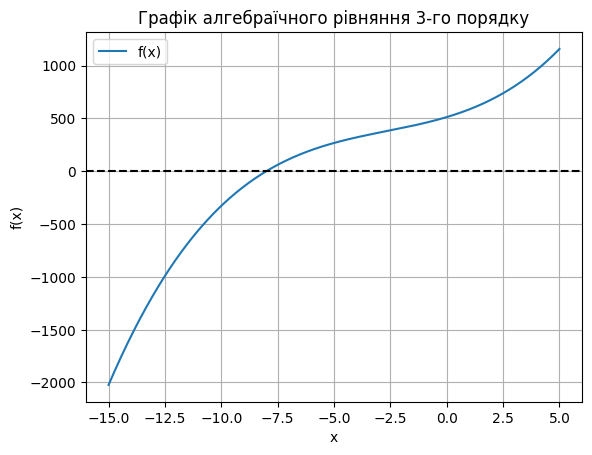

In [10]:
import matplotlib.pyplot as plt

def f_poly(x):
    return x**3 + p * x**2 + p**2 * x + p**3

x_vals = np.linspace(-15, 5, 500)
y_vals = [f_poly(x) for x in x_vals]

plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', linestyle='--')
plt.title("Графік алгебраїчного рівняння 3-го порядку")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
coeffs = [1, p, p**2, p**3]
np.savetxt("poly_coeffs.txt", coeffs, fmt="%.5f")


In [12]:
def read_coeffs(filepath):
    return np.loadtxt(filepath)

def eval_poly(coeffs, x):
    result = 0
    for i, a in enumerate(reversed(coeffs)):
        result += a * x**i
    return result


In [13]:
def newton_gorner(coeffs, x0, eps=1e-14, max_iter=1000):
    n = len(coeffs)
    for k in range(max_iter):
        b = [coeffs[0]]
        for i in range(1, n):
            b.append(coeffs[i] + x0 * b[-1])
        f_val = b[-1]
        c = [b[0]]
        for i in range(1, n-1):
            c.append(b[i] + x0 * c[-1])
        f_prime = c[-1]
        if abs(f_prime) < 1e-12:
            break
        x1 = x0 - f_val / f_prime
        if abs(x1 - x0) < eps:
            return x1, k + 1
        x0 = x1
    return x0, max_iter

coeffs = read_coeffs("poly_coeffs.txt")
real_root, iter_newton = newton_gorner(coeffs, -p)
print(f"[Горнер] Дійсний корінь ≈ {real_root:.10f}, ітерацій: {iter_newton}")


[Горнер] Дійсний корінь ≈ -8.0000000000, ітерацій: 1


In [14]:
def lin_method_fixed(coeffs, p0, q0, eps=1e-14, max_iter=1000):
    p, q = p0, q0
    n = len(coeffs)
    for _ in range(max_iter):
        b = [0] * n
        c = [0] * n
        b[0] = coeffs[0]
        b[1] = coeffs[1] + p * b[0]
        for i in range(2, n):
            b[i] = coeffs[i] + p * b[i - 1] + q * b[i - 2]
        c[0] = b[0]
        c[1] = b[1] + p * c[0]
        for i in range(2, n - 1):
            c[i] = b[i] + p * c[i - 1] + q * c[i - 2]

        # система для уточнення p і q
        det = c[n - 3] * c[n - 3] - c[n - 4] * c[n - 2]
        if abs(det) < 1e-14:
            break
        dp = (-b[n - 2] * c[n - 3] + b[n - 1] * c[n - 4]) / det
        dq = (-b[n - 1] * c[n - 3] + b[n - 2] * c[n - 2]) / det
        p += dp
        q += dq
        if abs(dp) < eps and abs(dq) < eps:
            break
    return p, q


In [15]:
# Початкові значення для p і q (не плутати з параметром p=8!)
p_quad, q_quad = lin_method_fixed(coeffs, p0=0.0, q0=10.0)

# Обчислюємо корені квадратного множника x² + p x + q
D = p_quad**2 - 4 * q_quad
if D >= 0:
    r1 = (-p_quad + np.sqrt(D)) / 2
    r2 = (-p_quad - np.sqrt(D)) / 2
    print(f"[Лін] Два дійсних корені: {r1:.10f}, {r2:.10f}")
else:
    real = -p_quad / 2
    imag = np.sqrt(-D) / 2
    print(f"[Лін] Комплексні корені: {real:.10f} ± {imag:.10f}i")


[Лін] Два дійсних корені: 8.0000000000, -8.0000000000
